In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from kmodes.kmodes import KModes

In [2]:
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score

In [3]:
import sys
sys.path.append('../../src/GLFMpython/')
import GLFM

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist

In [6]:
import time
import datetime
import math
import csv
import random
import string

import train # import art_train
import test #import art_test

In [7]:
def elbow_method(X, C):
    model_mean = KElbowVisualizer(KMeans(),metric='calinski_harabaz', k=10)
    model_mean.fit(X)
    model_mean.poof()
    
    data = {}
    data['C'] = C
    data['X'] = X
    hidden = dict()
    N = len(X)
    hidden['Z'] = np.random.randint(0,2,size=(N,2)).astype('float64')
    params = dict()
    params['alpha'] = 2   # concentration parameter for the IBP
    params['Niter'] = 100 # number of algorithm iterations
    params['maxK'] = 10
    params['verbose'] = 0 #do not show messages
    hidden = GLFM.infer(data, hidden,params)
    z = hidden['Z']
    
    
    model_modes = KElbowVisualizer(KModes(),metric='calinski_harabaz', k=10)
    model_modes.fit(z)
    model_modes.poof()
    

In [8]:
def clustering_score(X, n_means, n_modes, C):
    # X is the data, y is target, n is the number of classes, C is the types of X features.
    np.random.seed(5)
    
    
    #K-means.   

    k_means = KMeans(n_clusters=n_means)
    k_means.fit(X)
    labels = k_means.labels_
    
    k_means_score = silhouette_score(X, labels)
    
    
    # GLFM.
    
    data = {}
    data['C'] = C
    data['X'] = X
    hidden = dict()
    N = len(X)
    hidden['Z'] = np.random.randint(0,2,size=(N,2)).astype('float64')
    params = dict()
    params['alpha'] = 2   # concentration parameter for the IBP
    params['Niter'] = 100 # number of algorithm iterations
    params['maxK'] = 10
    params['verbose'] = 0 #do not show messages
    hidden = GLFM.infer(data, hidden,params)
    z = hidden['Z']

    
    # GLFM + K_modes
    
    k_modes = KModes(n_clusters=n_modes)
    k_modes.fit(z)
    labels = k_modes.labels_

    k_modes_score = silhouette_score(X, labels)


    # GLFM + Art
    
    r = 0.9
    Tmatrix = train.art_train(z,rho=r) #,beta=0.000001,alpha=1.0,nep=1)
    T = test.art_test(z,Tmatrix,rho=r) #,beta=0.000001,alpha=1.0,nep=1)
    labels = T['Template']

    Art_score = silhouette_score(X, labels)

    # Result Table

    table = pd.DataFrame(data={'k_means':k_means_score,'k_modes + GLFM' : k_modes_score,
                                'Art + GLFM':Art_score}, columns = ['k_means','k_modes + GLFM','Art + GLFM'],
                          index = ['silhouette_score'])
    return table



# Frogs_MFCCs

In [9]:
frogs = pd.read_csv('Frogs_MFCCs.csv')

In [10]:
X = frogs.iloc[:,:22]

In [11]:
C = []
for i  in range(0,22):
    C.append('g')
C = ''.join(C)

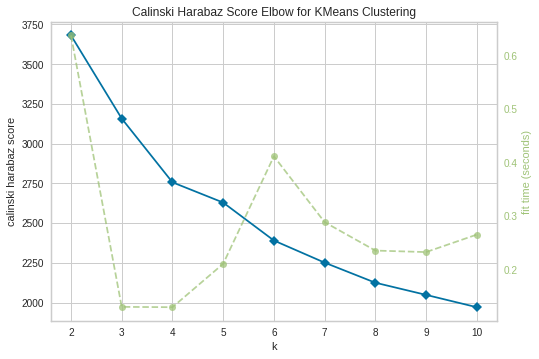

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=22, Kest=8, maxR=1


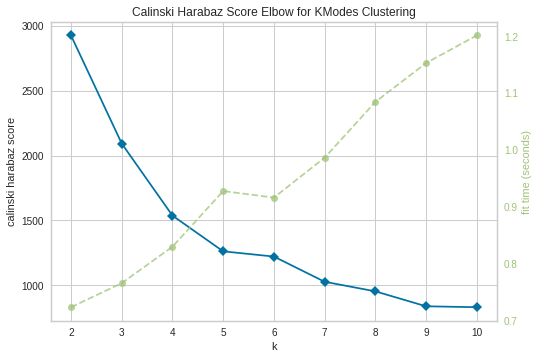

In [12]:
elbow_method(X,C)

In [13]:
table_frogs = clustering_score(X,4,5,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=22, Kest=8, maxR=1


In [14]:
table_frogs

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.378751,0.117589,0.066223


# gene

In [88]:
gene = pd.read_csv('gene_data.csv')

In [89]:
gene.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [90]:
gene.shape

(801, 20532)

In [91]:
X = gene.iloc[:20,1:]

In [92]:
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [93]:
C = []
for i  in range(0,20531):
    C.append('g')
C = ''.join(C)

In [95]:
table_gene = clustering_score(X,4,4,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=20531, Kest=2, maxR=1


In [96]:
table_gene

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.185599,0.100578,0.100578


# Transaction

In [15]:
transaction = pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')

In [16]:
transaction.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [17]:
transaction.shape

(811, 107)

In [18]:
X = transaction.iloc[:,1:55]

In [19]:
X = X.values.astype('float64')

In [20]:
X

array([[11., 12., 10., ..., 10.,  3., 21.],
       [ 7.,  6.,  3., ...,  0.,  0., 10.],
       [ 7., 11.,  8., ...,  7.,  3., 14.],
       ...,
       [ 1.,  0.,  0., ...,  3.,  0.,  4.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  1.,  0., ...,  1.,  0.,  3.]])

In [21]:
C = []
for i  in range(0,54):
    C.append('p')
C = ''.join(C)

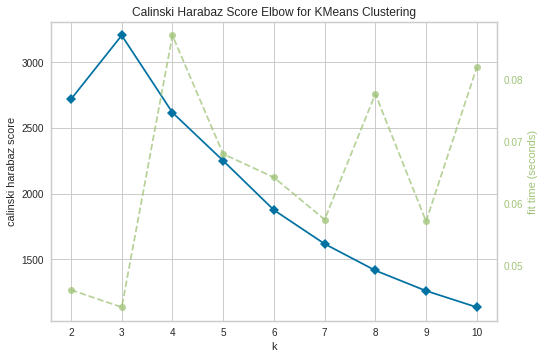

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=54, Kest=8, maxR=1


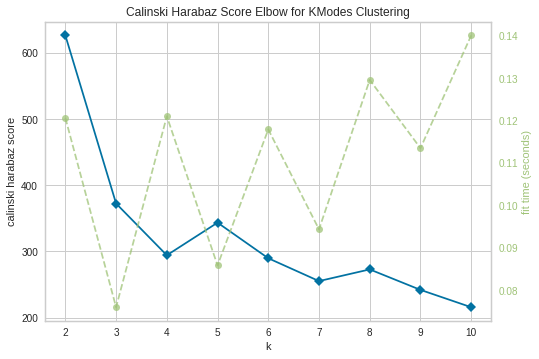

In [22]:
elbow_method(X,C)

In [23]:
table_transaction = clustering_score(X,4,4,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=54, Kest=8, maxR=1


In [24]:
table_transaction

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.56988,0.00939,-0.037055


# Turkey

In [25]:
turkiye = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [26]:
turkiye.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [27]:
C = []
for i  in range(0,33):
    C.append('p')
C = ''.join(C)

In [28]:
X = turkiye.values.astype('float64')

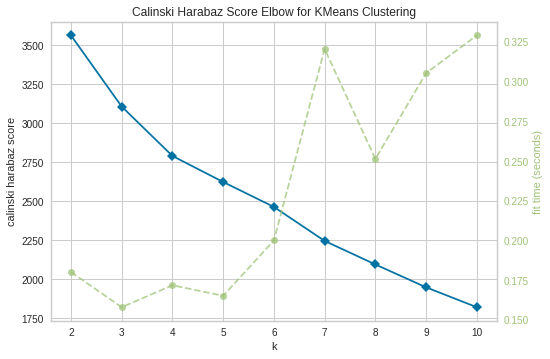

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=33, Kest=8, maxR=1


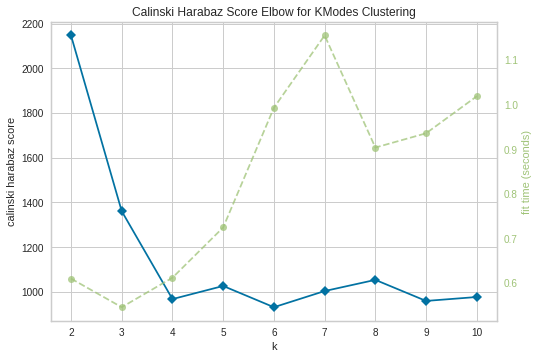

In [29]:
elbow_method(X,C)

In [30]:
table_turkiye = clustering_score(X,4,4,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=33, Kest=8, maxR=1


In [31]:
table_turkiye

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.253249,-0.019836,-0.137149


# Absenteeism_at_work

In [32]:
Absenteeism = pd.read_csv('Absenteeism_at_work.csv',sep = ';')

In [33]:
Absenteeism.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [34]:
Absenteeism.loc[0]

ID                                  11.000
Reason for absence                  26.000
Month of absence                     7.000
Day of the week                      3.000
Seasons                              1.000
Transportation expense             289.000
Distance from Residence to Work     36.000
Service time                        13.000
Age                                 33.000
Work load Average/day              239.554
Hit target                          97.000
Disciplinary failure                 0.000
Education                            1.000
Son                                  2.000
Social drinker                       1.000
Social smoker                        0.000
Pet                                  1.000
Weight                              90.000
Height                             172.000
Body mass index                     30.000
Absenteeism time in hours            4.000
Name: 0, dtype: float64

In [35]:
X = Absenteeism.iloc[:,:-1]

In [36]:
X.loc[0]

ID                                  11.000
Reason for absence                  26.000
Month of absence                     7.000
Day of the week                      3.000
Seasons                              1.000
Transportation expense             289.000
Distance from Residence to Work     36.000
Service time                        13.000
Age                                 33.000
Work load Average/day              239.554
Hit target                          97.000
Disciplinary failure                 0.000
Education                            1.000
Son                                  2.000
Social drinker                       1.000
Social smoker                        0.000
Pet                                  1.000
Weight                              90.000
Height                             172.000
Body mass index                     30.000
Name: 0, dtype: float64

In [37]:
C = []
for i  in range(0,20):
    C.append('p')
C = ''.join(C)

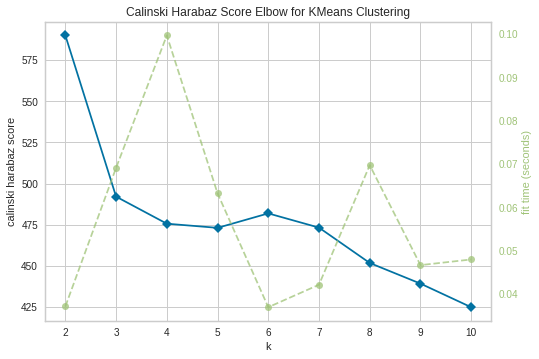

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=20, Kest=8, maxR=1


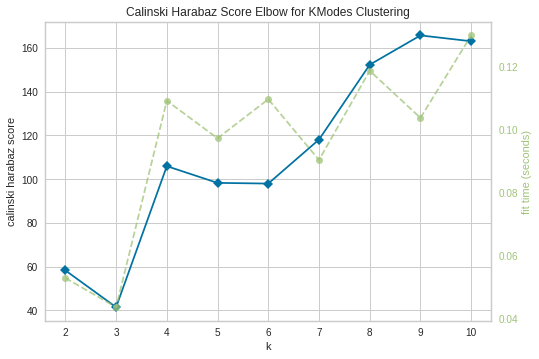

In [38]:
elbow_method(X,C)

In [39]:
table_Absenteeism = clustering_score(X,4,3,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=20, Kest=8, maxR=1


In [40]:
table_Absenteeism

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.359188,-0.135658,-0.364697


# Iris

In [41]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

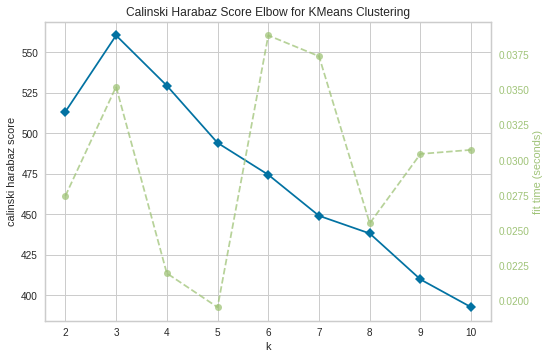

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1


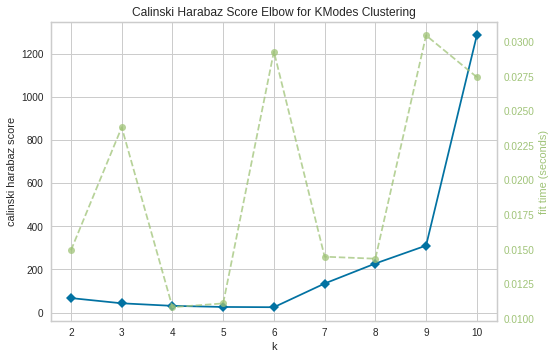

In [44]:
elbow_method(X,'pppp')

In [45]:
table_iris = clustering_score(X,5,6,'pppp')

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1


In [46]:
table_iris

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.488518,-0.037367,0.055501


# Then Wine Data

In [47]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

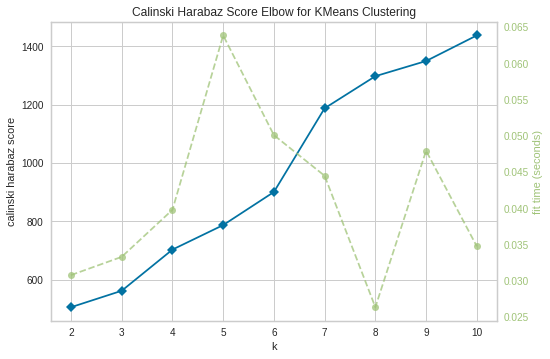

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=13, Kest=8, maxR=1


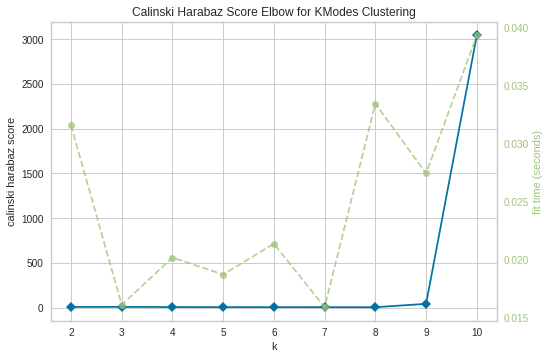

In [48]:
elbow_method(X,'ppppppppppppp')

In [49]:
table_wine = clustering_score(X,6,9,'ppppppppppppp')

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=13, Kest=8, maxR=1


In [50]:
table_wine

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.565641,-0.683933,-0.673745


# kdd

In [51]:
kdd = pd.read_csv('kddcup.data_10_percent_corrected.csv', header = None, names = ['duration','protocol_type','service',
'flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','target'])

In [52]:
kdd = kdd.sample(frac=1).reset_index(drop=True)

In [53]:
kdd_cut = kdd.iloc[:10000,:].copy()

In [54]:
kdd_cut['protocol_type'].replace(kdd['protocol_type'].unique(),
                                 [i for i in range(1, len(kdd_cut['protocol_type'].unique()) + 1)], inplace = True)

In [55]:
kdd_cut['service'].replace(kdd_cut['service'].unique(),
                           [i for i in range(1, len(kdd_cut['service'].unique()) + 1)], inplace = True)

In [56]:
kdd_cut['flag'].replace(kdd_cut['flag'].unique(),
                           [i for i in range(1, len(kdd_cut['flag'].unique()) + 1)], inplace = True)

In [57]:
kdd_cut['target'].replace(kdd_cut['target'].unique(),
                           [i for i in range(1, len(kdd_cut['target'].unique()) + 1)], inplace = True)

In [58]:
X = kdd_cut.iloc[:,:-1]

In [59]:
y = kdd_cut.iloc[:,-1]

In [60]:
X = X.values

In [61]:
y = y.values

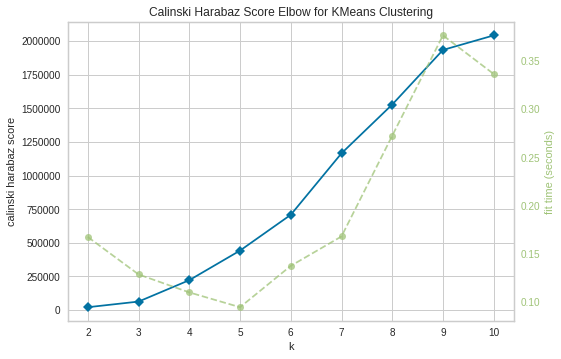

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=41, Kest=8, maxR=58


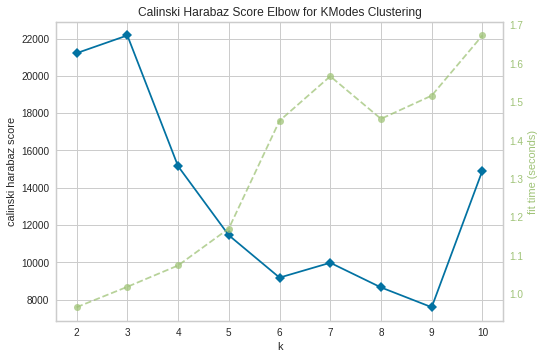

In [62]:
elbow_method(X,'ncccnnnnnnnnnnnnnnnnnnnnpppppppnnpppppppp')

In [63]:
table_kdd = clustering_score(X,6,6,'ncccnnnnnnnnnnnnnnnnnnnnpppppppnnpppppppp')

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=41, Kest=8, maxR=58


In [64]:
table_kdd

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.969252,0.103134,0.111938


# Cover Type

In [65]:
covtype = pd.read_csv('covtype.data.csv',header = None)

In [66]:
covtype.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [67]:
covtype = covtype.sample(frac=1).reset_index(drop=True)

In [68]:
covtype_cut = covtype.iloc[:10000,:].copy()

In [69]:
covtype_cut.iloc[:,-1].unique()

array([5, 2, 7, 1, 3, 6, 4])

In [71]:
X = covtype_cut.iloc[:,:-1].values.astype('float64')

In [72]:
y = covtype_cut.iloc[:,-1].values

In [73]:
C = []
for i  in range(0,6):
    C.append('p')
C.append('nnnp')

for i in range(10,54):
    C.append('o')

In [74]:
C = ''.join(C)

In [75]:
C

'ppppppnnnpoooooooooooooooooooooooooooooooooooooooooooo'

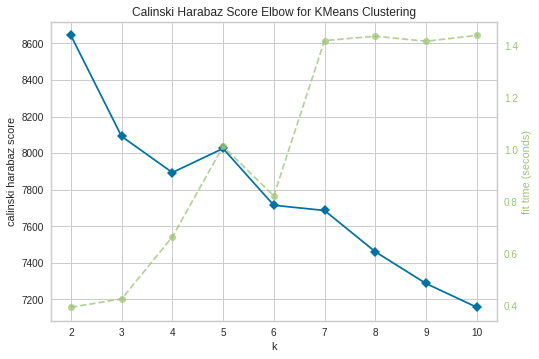

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=54, Kest=8, maxR=2


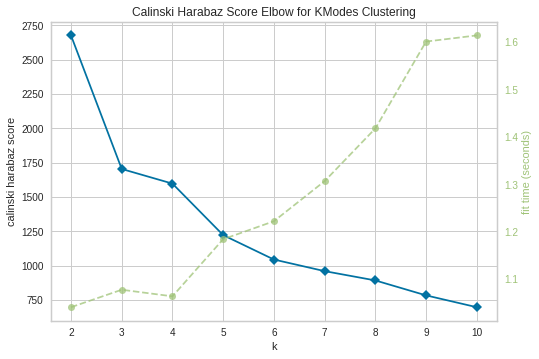

In [77]:
elbow_method(X,C)

In [78]:
table_covtype = clustering_score(X,4,3,C)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=54, Kest=8, maxR=2


In [79]:
table_covtype

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.335697,-0.047588,-0.468092


# Result

In [80]:
table_iris

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.488518,-0.037367,0.055501


In [81]:
table_wine

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.565641,-0.683933,-0.673745


In [82]:
table_kdd

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.969252,0.103134,0.111938


In [83]:
table_covtype

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.335697,-0.047588,-0.468092


In [84]:
table_Absenteeism

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.359188,-0.135658,-0.364697


In [85]:
table_frogs

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.378751,0.117589,0.066223


In [86]:
table_turkiye

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.253249,-0.019836,-0.137149


In [87]:
table_transaction

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.56988,0.00939,-0.037055


In [97]:
table_gene

,k_means,k_modes + GLFM,Art + GLFM
silhouette_score,0.185599,0.100578,0.100578
